## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.420715 -0.512782 -1.343286  0.886415  0.013573  1.484724
1  0.049642 -1.172660 -0.842868 -0.049544  0.643068 -0.444922
2  0.092259  1.315760 -0.500908 -1.935317  0.316251 -0.210797
3  1.174154 -0.594440 -0.500599  0.678286 -0.058714  0.522122
4 -0.082597  0.483297 -0.169589  0.774322  1.197035  0.998900


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9712330	total: 57.9ms	remaining: 57.9s
1:	learn: 0.9627437	total: 58.3ms	remaining: 29.1s
2:	learn: 0.9522723	total: 58.9ms	remaining: 19.6s
3:	learn: 0.9440006	total: 59.5ms	remaining: 14.8s
4:	learn: 0.9348677	total: 60ms	remaining: 11.9s
5:	learn: 0.9257957	total: 60.5ms	remaining: 10s
6:	learn: 0.9157344	total: 60.9ms	remaining: 8.64s
7:	learn: 0.9068933	total: 61.5ms	remaining: 7.63s
8:	learn: 0.8975782	total: 62ms	remaining: 6.83s
9:	learn: 0.8884418	total: 62.5ms	remaining: 6.19s
10:	learn: 0.8805612	total: 63ms	remaining: 5.67s
11:	learn: 0.8713045	total: 63.7ms	remaining: 5.24s
12:	learn: 0.8614956	total: 64.2ms	remaining: 4.88s
13:	learn: 0.8515921	total: 64.7ms	remaining: 4.56s
14:	learn: 0.8442578	total: 65.2ms	remaining: 4.28s
15:	learn: 0.8362058	total: 65.6ms	remaining: 4.04s
16:	learn: 0.8281511	total: 66.1ms	remaining: 3.82s
17:	learn: 0.8206944	total: 66.6ms	remaining: 3.63s
18:	learn: 0.8110786	total: 67.1ms	remaining: 3.46s


107:	learn: 0.3718931	total: 106ms	remaining: 875ms
108:	learn: 0.3690940	total: 106ms	remaining: 870ms
109:	learn: 0.3664148	total: 107ms	remaining: 865ms
110:	learn: 0.3632393	total: 107ms	remaining: 861ms
111:	learn: 0.3602977	total: 108ms	remaining: 855ms
112:	learn: 0.3570833	total: 108ms	remaining: 850ms
113:	learn: 0.3547348	total: 109ms	remaining: 846ms
114:	learn: 0.3514528	total: 109ms	remaining: 841ms
115:	learn: 0.3482755	total: 110ms	remaining: 836ms
116:	learn: 0.3455579	total: 110ms	remaining: 831ms
117:	learn: 0.3431946	total: 111ms	remaining: 827ms
118:	learn: 0.3410889	total: 111ms	remaining: 822ms
119:	learn: 0.3383059	total: 111ms	remaining: 817ms
120:	learn: 0.3355688	total: 112ms	remaining: 812ms
121:	learn: 0.3333229	total: 112ms	remaining: 808ms
122:	learn: 0.3304834	total: 113ms	remaining: 803ms
123:	learn: 0.3273225	total: 113ms	remaining: 799ms
124:	learn: 0.3250093	total: 113ms	remaining: 794ms
125:	learn: 0.3228155	total: 114ms	remaining: 790ms
126:	learn: 

284:	learn: 0.1073779	total: 187ms	remaining: 468ms
285:	learn: 0.1067942	total: 187ms	remaining: 467ms
286:	learn: 0.1062725	total: 188ms	remaining: 466ms
287:	learn: 0.1057075	total: 188ms	remaining: 465ms
288:	learn: 0.1052566	total: 189ms	remaining: 465ms
289:	learn: 0.1047408	total: 189ms	remaining: 464ms
290:	learn: 0.1040938	total: 190ms	remaining: 463ms
291:	learn: 0.1035196	total: 190ms	remaining: 461ms
292:	learn: 0.1029229	total: 191ms	remaining: 460ms
293:	learn: 0.1022553	total: 191ms	remaining: 459ms
294:	learn: 0.1017974	total: 192ms	remaining: 458ms
295:	learn: 0.1011895	total: 192ms	remaining: 457ms
296:	learn: 0.1004375	total: 193ms	remaining: 456ms
297:	learn: 0.0999014	total: 193ms	remaining: 455ms
298:	learn: 0.0994463	total: 194ms	remaining: 454ms
299:	learn: 0.0990074	total: 194ms	remaining: 453ms
300:	learn: 0.0984444	total: 194ms	remaining: 451ms
301:	learn: 0.0976173	total: 195ms	remaining: 450ms
302:	learn: 0.0971426	total: 195ms	remaining: 450ms
303:	learn: 

504:	learn: 0.0373170	total: 290ms	remaining: 284ms
505:	learn: 0.0371348	total: 290ms	remaining: 283ms
506:	learn: 0.0370616	total: 291ms	remaining: 283ms
507:	learn: 0.0368542	total: 291ms	remaining: 282ms
508:	learn: 0.0367825	total: 292ms	remaining: 281ms
509:	learn: 0.0365811	total: 292ms	remaining: 281ms
510:	learn: 0.0364118	total: 293ms	remaining: 280ms
511:	learn: 0.0362912	total: 293ms	remaining: 279ms
512:	learn: 0.0361316	total: 294ms	remaining: 279ms
513:	learn: 0.0359343	total: 294ms	remaining: 278ms
514:	learn: 0.0358653	total: 295ms	remaining: 277ms
515:	learn: 0.0357041	total: 295ms	remaining: 277ms
516:	learn: 0.0355127	total: 295ms	remaining: 276ms
517:	learn: 0.0353986	total: 296ms	remaining: 275ms
518:	learn: 0.0352105	total: 296ms	remaining: 275ms
519:	learn: 0.0350586	total: 297ms	remaining: 274ms
520:	learn: 0.0349575	total: 297ms	remaining: 273ms
521:	learn: 0.0348707	total: 297ms	remaining: 272ms
522:	learn: 0.0347856	total: 298ms	remaining: 272ms
523:	learn: 

671:	learn: 0.0193143	total: 370ms	remaining: 181ms
672:	learn: 0.0192841	total: 370ms	remaining: 180ms
673:	learn: 0.0192159	total: 371ms	remaining: 179ms
674:	learn: 0.0191586	total: 371ms	remaining: 179ms
675:	learn: 0.0190924	total: 372ms	remaining: 178ms
676:	learn: 0.0190432	total: 372ms	remaining: 178ms
677:	learn: 0.0189925	total: 373ms	remaining: 177ms
678:	learn: 0.0189375	total: 373ms	remaining: 176ms
679:	learn: 0.0188943	total: 374ms	remaining: 176ms
680:	learn: 0.0188474	total: 374ms	remaining: 175ms
681:	learn: 0.0187897	total: 375ms	remaining: 175ms
682:	learn: 0.0187024	total: 375ms	remaining: 174ms
683:	learn: 0.0186636	total: 376ms	remaining: 174ms
684:	learn: 0.0186109	total: 376ms	remaining: 173ms
685:	learn: 0.0185590	total: 377ms	remaining: 172ms
686:	learn: 0.0185142	total: 377ms	remaining: 172ms
687:	learn: 0.0184777	total: 378ms	remaining: 171ms
688:	learn: 0.0184443	total: 378ms	remaining: 171ms
689:	learn: 0.0183596	total: 379ms	remaining: 170ms
690:	learn: 

896:	learn: 0.0104447	total: 473ms	remaining: 54.3ms
897:	learn: 0.0104356	total: 473ms	remaining: 53.8ms
898:	learn: 0.0104128	total: 474ms	remaining: 53.2ms
899:	learn: 0.0103906	total: 474ms	remaining: 52.7ms
900:	learn: 0.0103817	total: 475ms	remaining: 52.2ms
901:	learn: 0.0103601	total: 475ms	remaining: 51.6ms
902:	learn: 0.0103303	total: 476ms	remaining: 51.1ms
903:	learn: 0.0103160	total: 476ms	remaining: 50.5ms
904:	learn: 0.0103090	total: 477ms	remaining: 50ms
905:	learn: 0.0102552	total: 477ms	remaining: 49.5ms
906:	learn: 0.0102211	total: 478ms	remaining: 49ms
907:	learn: 0.0101947	total: 478ms	remaining: 48.4ms
908:	learn: 0.0101613	total: 479ms	remaining: 47.9ms
909:	learn: 0.0101408	total: 479ms	remaining: 47.4ms
910:	learn: 0.0101081	total: 479ms	remaining: 46.8ms
911:	learn: 0.0100664	total: 480ms	remaining: 46.3ms
912:	learn: 0.0100253	total: 480ms	remaining: 45.8ms
913:	learn: 0.0099999	total: 481ms	remaining: 45.3ms
914:	learn: 0.0099864	total: 482ms	remaining: 44.7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

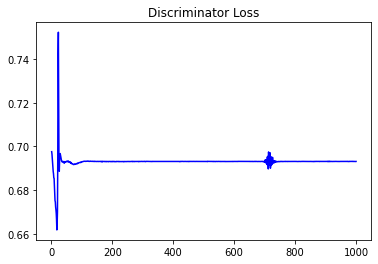

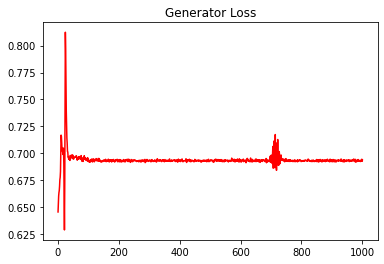

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.12230745708409461


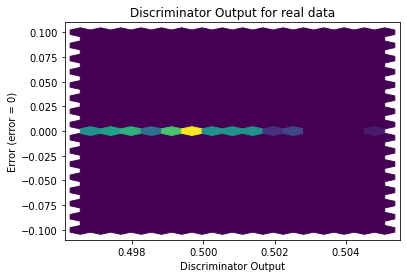

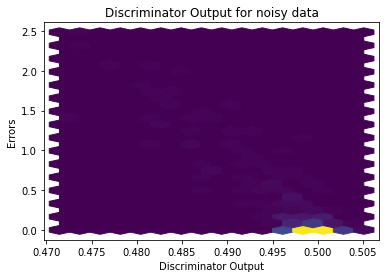

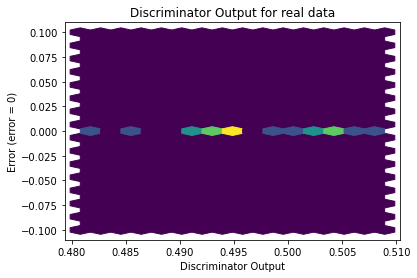

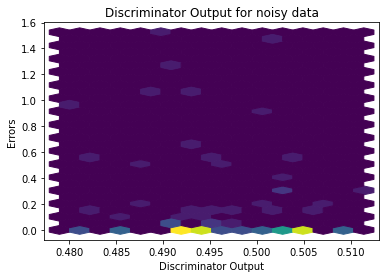

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


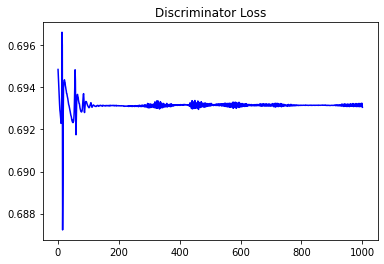

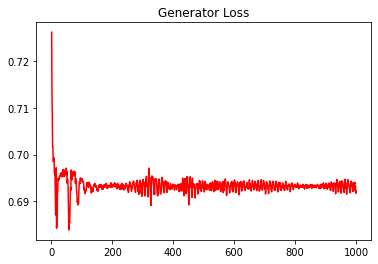

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.14356829168279037


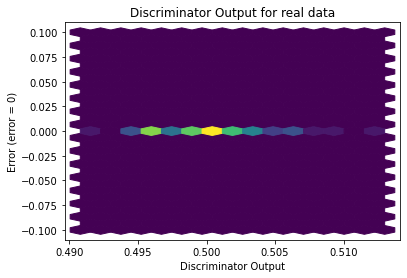

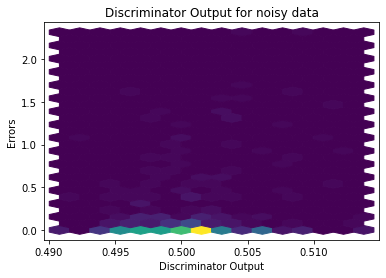

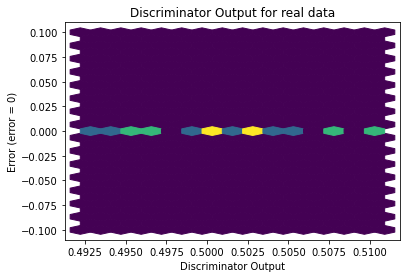

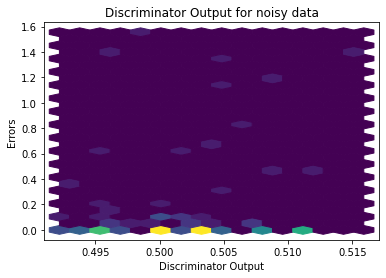

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0396]], requires_grad=True)
